# Comparação com a capital - Rio de Janeiro

Como dito anteriormente, desejamos analisar o fluxo da criminalidade entre os municípios do estado do Rio de Janeiro. A capital do estado, Rio de Janeiro, não é conhecida somente por sua beleza, mas também por ser uma cidade bastante perigosa. Dado isso, vamos analisar como as outras três regiões (Interior, Baixada Fluminense, Grande Niterói) se relacionam com o município do Rio de Janeiro utilizando os índices criados no notebook 3 (Índices de criminalidade): o índice de criminalidade, roubos, furtos, lesões e letalidades, e outros.

Criamos um [módulo](Taxas_de_crescimento.py) para organizar os cálculos necessários. Tal módulo possui duas funções:

* taxa_de_crescimento(): recebe como parâmetro o tipo de índice e retorna um DataFrame contendo uma coluna especificando a data (ano/mês), uma coluna especificando a região e uma coluna contendo as taxas de crescimento do índice, ordenado de acordo com a data e a região.

* taxa_de_crescimento_relativo(): semelhante à função acima, mas retornando a diferença entre a taxa de crescimento de uma determinada região e o município Rio de Janeiro.

Veja os seguintes exemplos:

In [1]:
import Taxas_de_crescimento as tc
import altair as alt
alt.renderers.enable('notebook')
import Correlação as corr
import Plots as pl
import Índice as ind

tc.taxa_de_crescimento('Furtos').head(16)

,Data,Região,Taxa de crescimento de Furtos
0,2014/01,Baixada Fluminense,0.000000
1,2014/01,Grande Niterói,0.000000
2,2014/01,Interior,0.000000
3,2014/01,Rio de Janeiro,0.000000
4,2014/02,Baixada Fluminense,-8.652610
5,2014/02,Grande Niterói,-11.580793
6,2014/02,Interior,-16.671256
7,2014/02,Rio de Janeiro,-4.501179
8,2014/03,Baixada Fluminense,7.895504
9,2014/03,Grande Niterói,4.386932


In [2]:
tc.taxa_de_crescimento_relativo('Índice de criminalidade').head(16)

,Data,Região,Taxa de crescimento relativo da criminalidade
0,2014/01,Baixada Fluminense,0.000000
1,2014/01,Grande Niterói,0.000000
2,2014/01,Interior,0.000000
3,2014/01,Rio de Janeiro,0.000000
4,2014/02,Baixada Fluminense,1.004985
5,2014/02,Grande Niterói,9.027155
6,2014/02,Interior,-4.007243
7,2014/02,Rio de Janeiro,0.000000
8,2014/03,Baixada Fluminense,-1.542460
9,2014/03,Grande Niterói,-12.993544


## Análise compartiva entre as regiões

Vamos verificar se existe algum período relativamente longo no qual os índices de criminalidade das diferentes regiões crescem (ou decrescem) mais que os índices de criminalidade da capital Rio de Janeiro. Nosso critério é o seguinte: se há algum fluxo de criminalidade da capital em direção a certa região (ou o movimento contrário) em algum período razoável, então haverá um período considerável no qual a taxa de crescimento relativo dessa região permaneceu positiva. Resolvemos então analisar graficamente a situação das taxas de crescimento e das taxas de crescimento relativo de cada índice.

Para tal criamos as seguintes funções no módulo [Plots](Plots.py):

* plot_taxa_de_crescimento(): recebe como parâmetro o tipo de índice e retorna quatro gráficos de linha, cada um representando a evolução da taxa de crescimento do índice ao longo do tempo. Observe abaixo a aplicação dessa função para os cinco índices.

* plot_taxa_de_crescimento_relativo(): semelhante à função acima, mas retornando a evolução das taxas de crescimento relativo. Observe abaixo a aplicação dessa função para os cinco índices. (Obs. a taxa de crescimento relativo do Rio de Janeiro é igual a 0, obviamente).

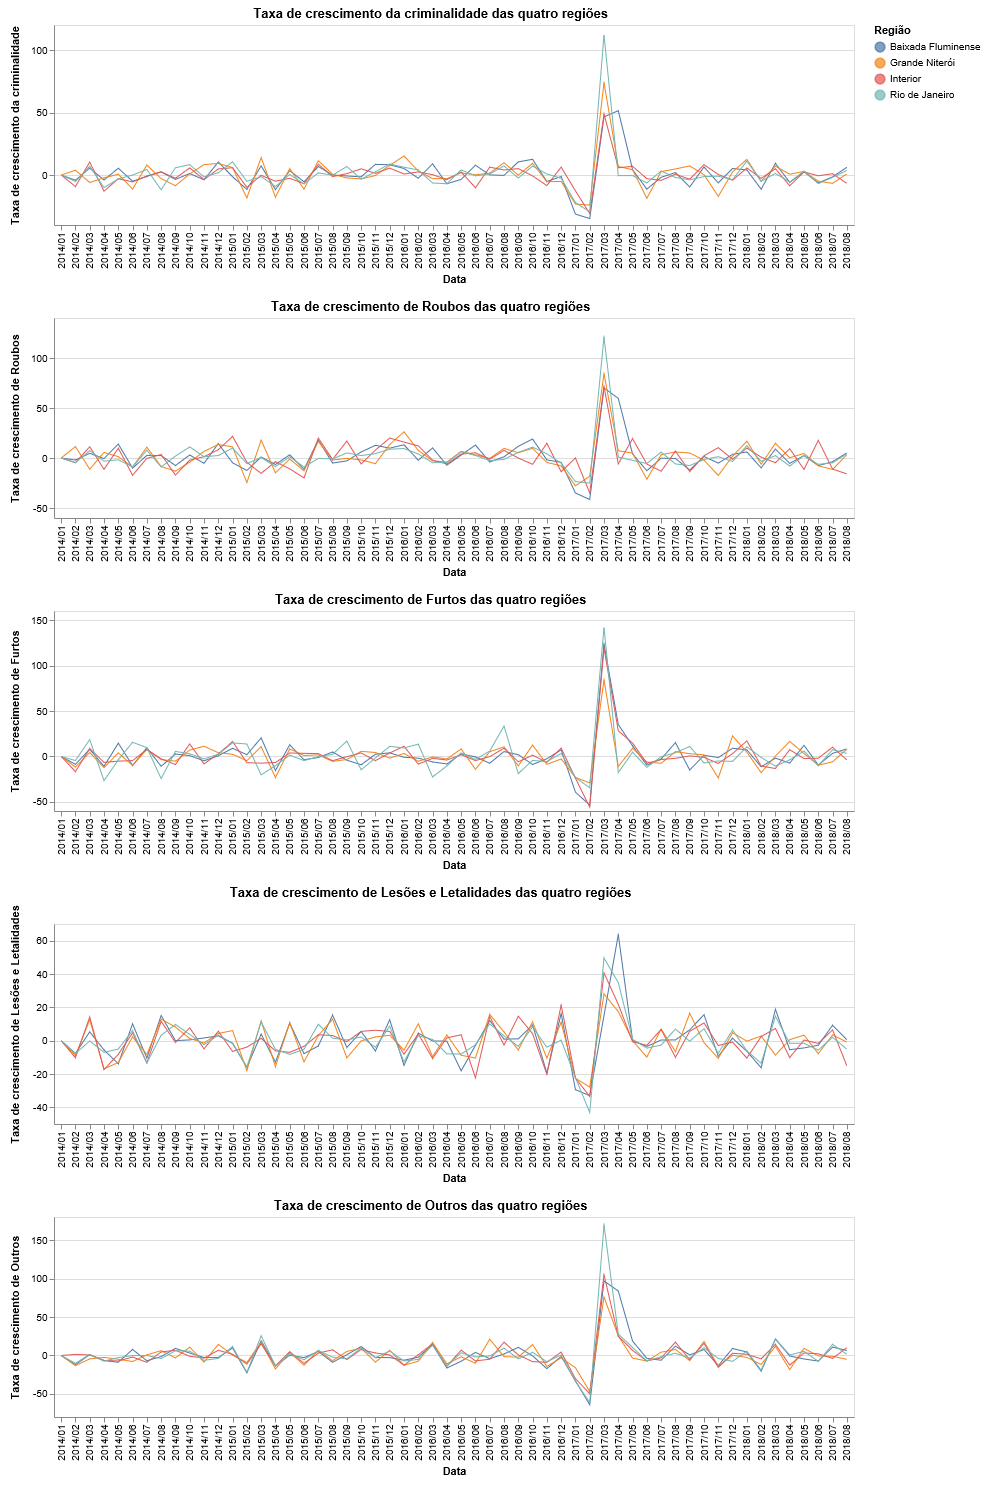

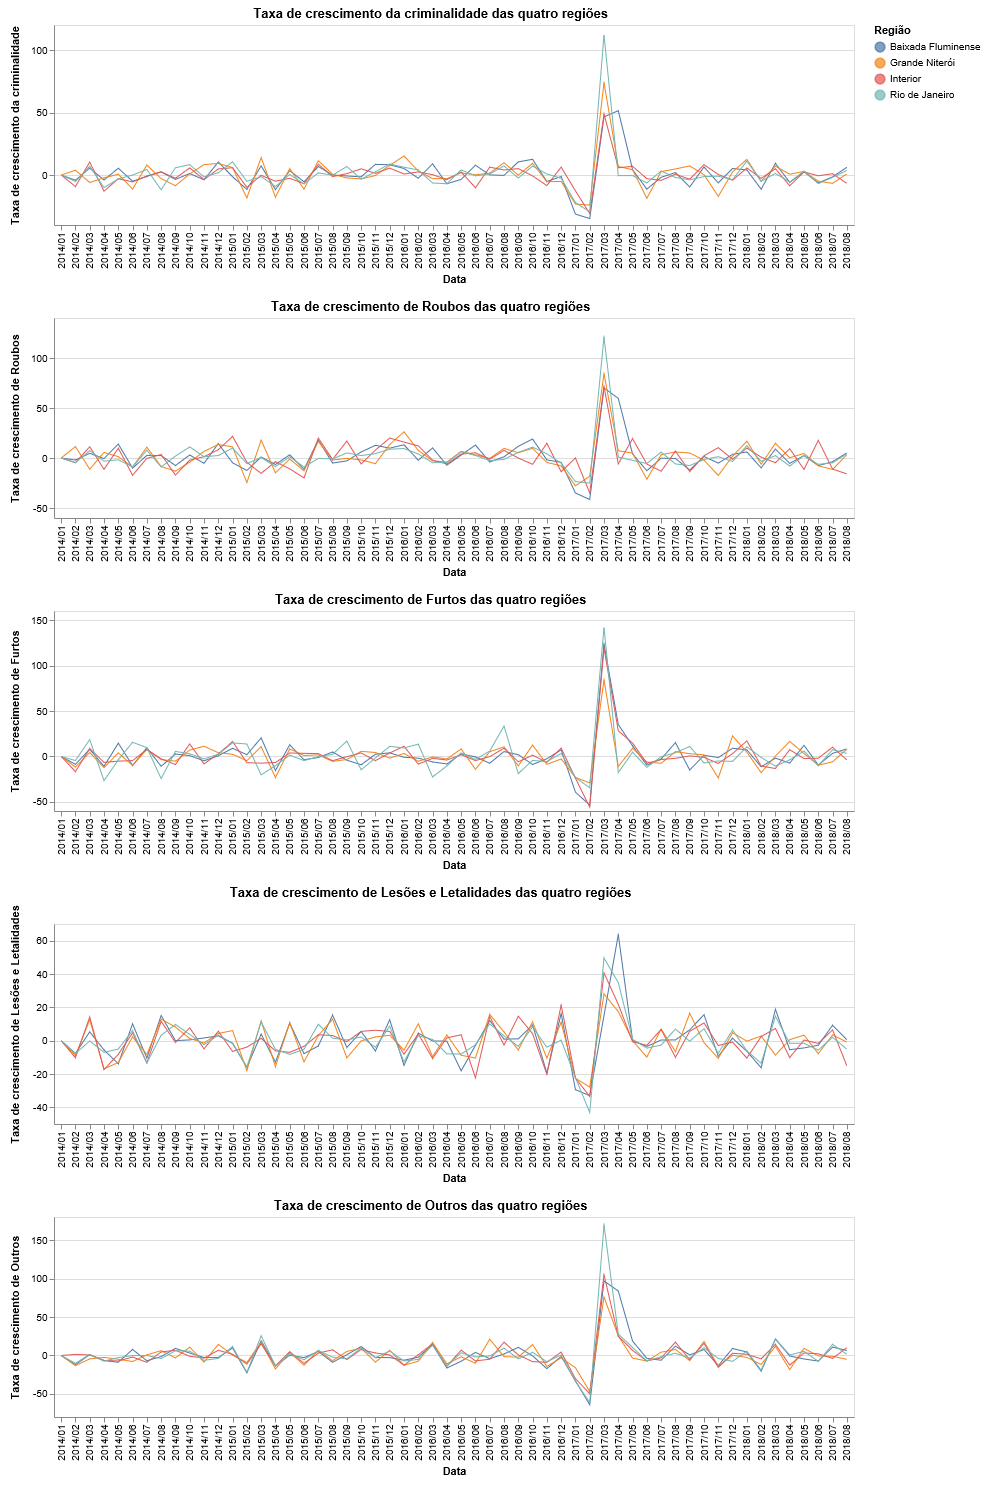

In [3]:
pl.plot_taxa_de_crescimento('Índice de criminalidade') & pl.plot_taxa_de_crescimento('Roubos') & pl.plot_taxa_de_crescimento('Furtos') & pl.plot_taxa_de_crescimento('Lesões e Letalidades') & pl.plot_taxa_de_crescimento('Outros')

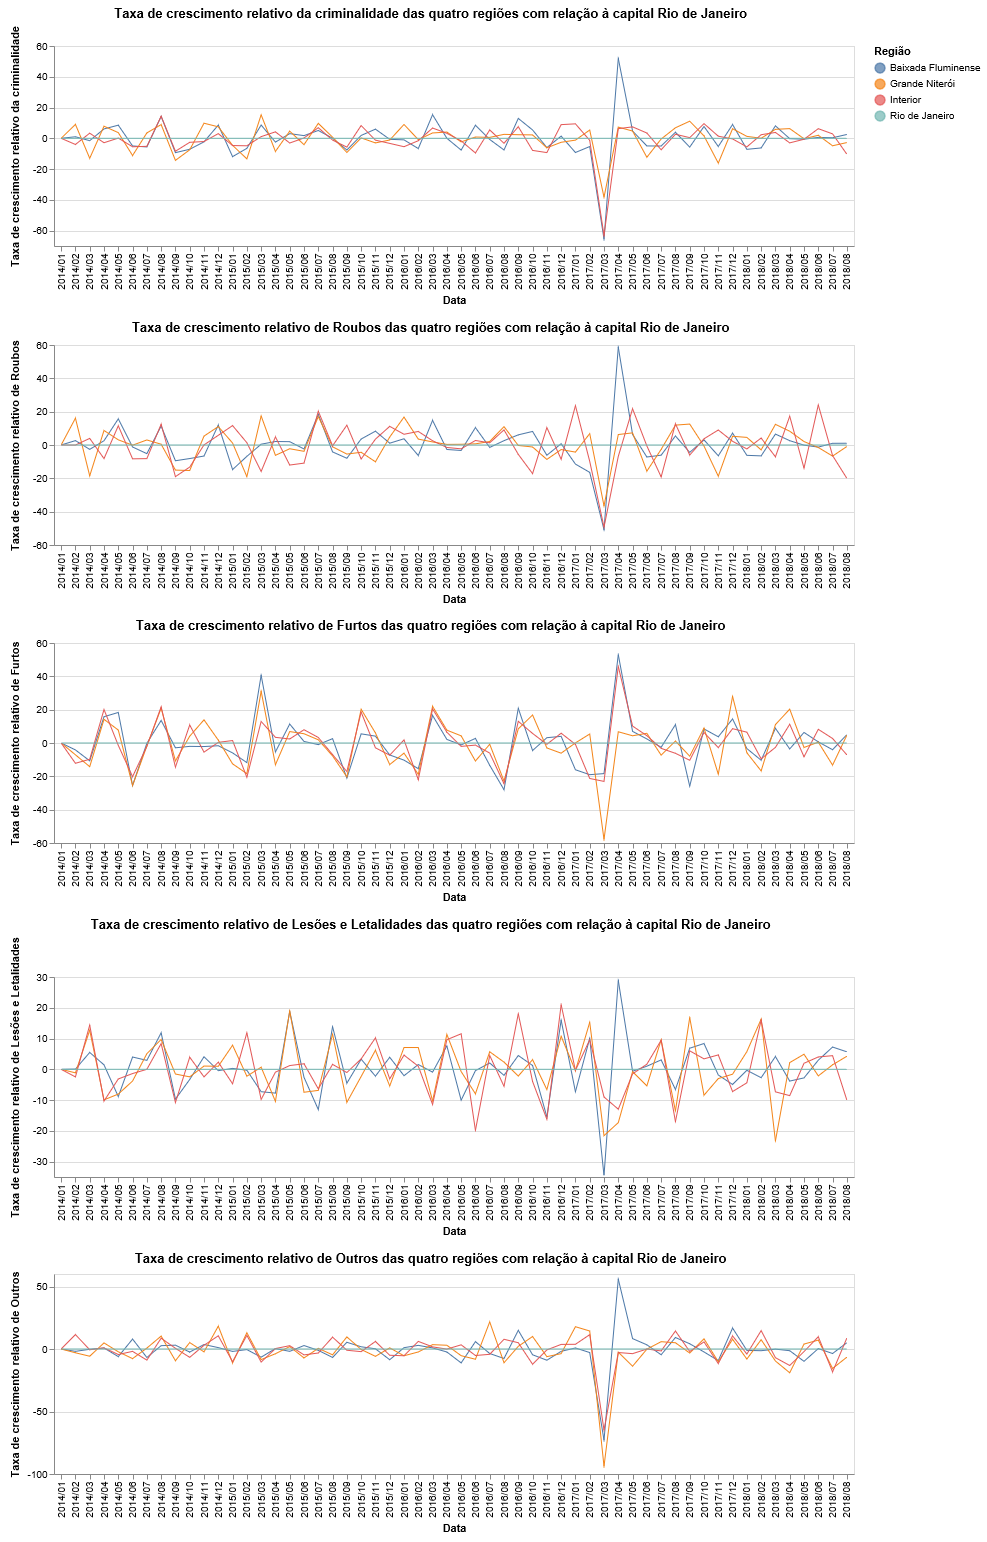

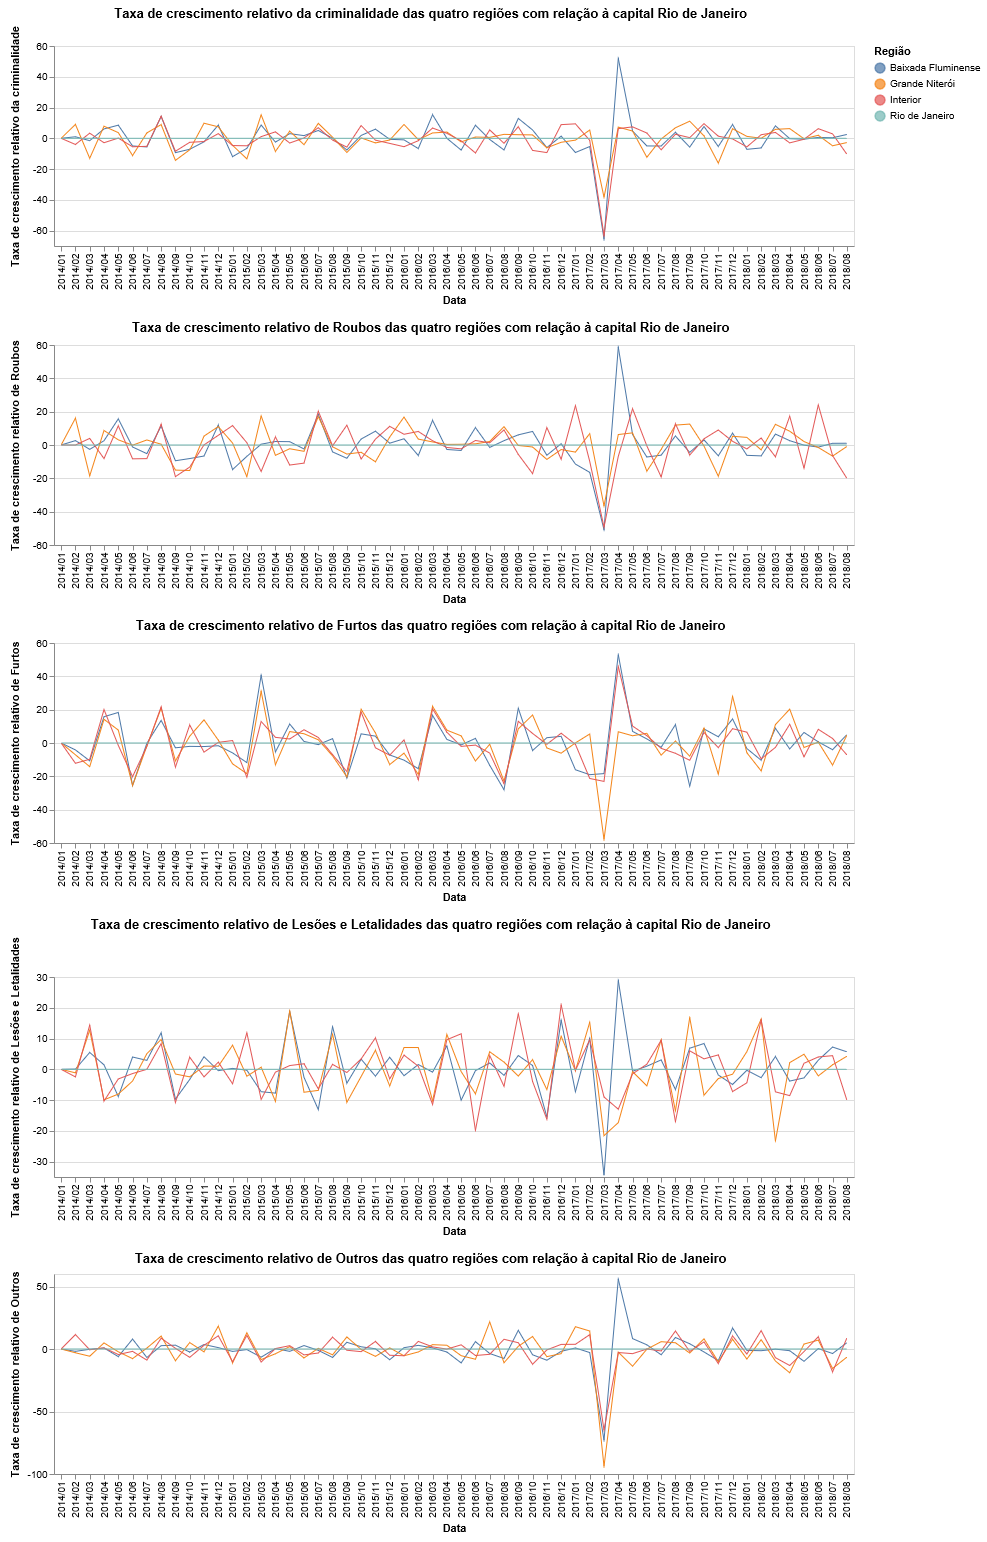

In [20]:
pl.plot_taxa_de_crescimento_relativo('Índice de criminalidade') & pl.plot_taxa_de_crescimento_relativo('Roubos') & pl.plot_taxa_de_crescimento_relativo('Furtos') & pl.plot_taxa_de_crescimento_relativo('Lesões e Letalidades') & pl.plot_taxa_de_crescimento_relativo('Outros')

In [15]:
corr.correlação('Índice de criminalidade')

Taxa de crescimento da criminalidade  \
Região                                                                    Baixada Fluminense   
                                     Região                                                    
Taxa de crescimento da criminalidade Baixada Fluminense                             1.000000   
                                     Grande Niterói                                 0.727737   
                                     Interior                                       0.719653   
                                     Rio de Janeiro                                 0.642669   

                                                                        \
Região                                                  Grande Niterói   
                                     Região                              
Taxa de crescimento da criminalidade Baixada Fluminense       0.727737   
                                     Grande Niterói           1.000000   
                                     Interior                 0.768353   
                                     Rio de Janeiro           0.855132   

                                                                   \
Região                                                   Interior   
                                     Região                         
Taxa de crescimento da criminalidade Baixada Fluminense  0.719653   
                                     Grande Niterói      0.768353   
                                     Interior            1.000000   
                                     Rio de Janeiro      0.838328   

                                                                        
Região                                                  Rio de Janeiro  
                                     Região                             
Taxa de crescimento da criminalidade Baixada Fluminense       0.642669  
                                     Grande Niterói           0.855132  
                                     Interior                 0.838328  
                                     Rio de Janeiro           1.000000

In [16]:
corr.correlação('Roubos')

Taxa de crescimento de Roubos  \
Região                                                      Baixada Fluminense   
                              Região                                             
Taxa de crescimento de Roubos Baixada Fluminense                      1.000000   
                              Grande Niterói                          0.739242   
                              Interior                                0.554630   
                              Rio de Janeiro                          0.723820   

                                                                           \
Região                                           Grande Niterói  Interior   
                              Região                                        
Taxa de crescimento de Roubos Baixada Fluminense       0.739242  0.554630   
                              Grande Niterói           1.000000  0.627549   
                              Interior                 0.627549  1.000000   
                              Rio de Janeiro           0.821780  0.707288   

                                                                 
Região                                           Rio de Janeiro  
                              Região                             
Taxa de crescimento de Roubos Baixada Fluminense       0.723820  
                              Grande Niterói           0.821780  
                              Interior                 0.707288  
                              Rio de Janeiro           1.000000

In [17]:
corr.correlação('Furtos')

Taxa de crescimento de Furtos  \
Região                                                      Baixada Fluminense   
                              Região                                             
Taxa de crescimento de Furtos Baixada Fluminense                      1.000000   
                              Grande Niterói                          0.800695   
                              Interior                                0.899920   
                              Rio de Janeiro                          0.790642   

                                                                           \
Região                                           Grande Niterói  Interior   
                              Região                                        
Taxa de crescimento de Furtos Baixada Fluminense       0.800695  0.899920   
                              Grande Niterói           1.000000  0.815874   
                              Interior                 0.815874  1.000000   
                              Rio de Janeiro           0.760490  0.830050   

                                                                 
Região                                           Rio de Janeiro  
                              Região                             
Taxa de crescimento de Furtos Baixada Fluminense       0.790642  
                              Grande Niterói           0.760490  
                              Interior                 0.830050  
                              Rio de Janeiro           1.000000

In [18]:
corr.correlação('Lesões e Letalidades')

Taxa de crescimento de Lesões e Letalidades  \
Região                                                                                  Baixada Fluminense   
                                            Região                                                           
Taxa de crescimento de Lesões e Letalidades Baixada Fluminense                                    1.000000   
                                            Grande Niterói                                        0.702613   
                                            Interior                                              0.682379   
                                            Rio de Janeiro                                        0.771628   

                                                                               \
Região                                                         Grande Niterói   
                                            Região                              
Taxa de crescimento de Lesões e Letalidades Baixada Fluminense       0.702613   
                                            Grande Niterói           1.000000   
                                            Interior                 0.742248   
                                            Rio de Janeiro           0.698776   

                                                                          \
Região                                                          Interior   
                                            Região                         
Taxa de crescimento de Lesões e Letalidades Baixada Fluminense  0.682379   
                                            Grande Niterói      0.742248   
                                            Interior            1.000000   
                                            Rio de Janeiro      0.743074   

                                                                               
Região                                                         Rio de Janeiro  
                                            Região                             
Taxa de crescimento de Lesões e Letalidades Baixada Fluminense       0.771628  
                                            Grande Niterói           0.698776  
                                            Interior                 0.743074  
                                            Rio de Janeiro           1.000000

In [19]:
corr.correlação('Outros')

Taxa de crescimento de Outros  \
Região                                                      Baixada Fluminense   
                              Região                                             
Taxa de crescimento de Outros Baixada Fluminense                      1.000000   
                              Grande Niterói                          0.813699   
                              Interior                                0.860349   
                              Rio de Janeiro                          0.859112   

                                                                           \
Região                                           Grande Niterói  Interior   
                              Região                                        
Taxa de crescimento de Outros Baixada Fluminense       0.813699  0.860349   
                              Grande Niterói           1.000000  0.866700   
                              Interior                 0.866700  1.000000   
                              Rio de Janeiro           0.858628  0.932141   

                                                                 
Região                                           Rio de Janeiro  
                              Região                             
Taxa de crescimento de Outros Baixada Fluminense       0.859112  
                              Grande Niterói           0.858628  
                              Interior                 0.932141  
                              Rio de Janeiro           1.000000